In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy, numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
warnings.filterwarnings("ignore")
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [117]:
resin_df = pd.read_csv("건포도.csv")
resin_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [118]:
x = resin_df.iloc[:, :-1]
y = resin_df.iloc[:, -1]
resin_df.info()
resin_df.isna().sum()
resin_df["Class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Class
Kecimen    450
Besni      450
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

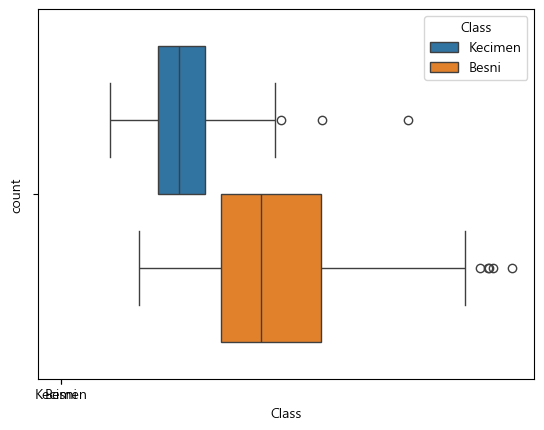

In [119]:
sns.countplot(x="Class", data=resin_df)
sns.boxplot(data=resin_df, x="Area", hue="Class")

<Axes: >

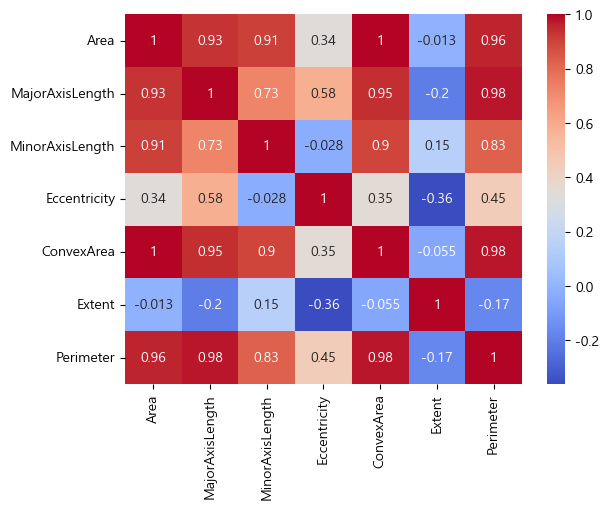

In [120]:
sns.heatmap(x.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='Area', ylabel='Target'>

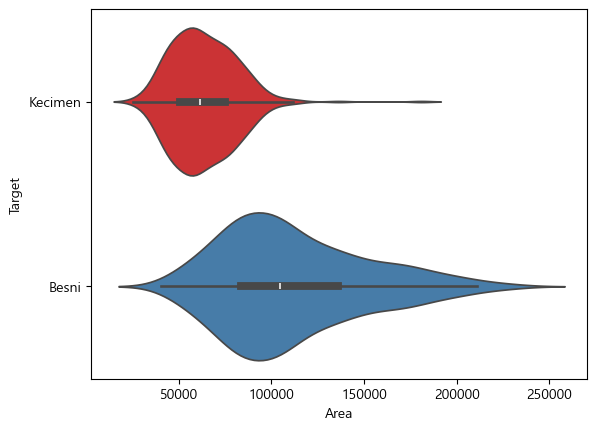

In [121]:
# 고상관 feature 그룹화하고 그 중 하나만 선택
# (Area, MajorAxisLength, MinorAxisLength, ConvexArea, Perimeter), Eccentricity, Extent -> Area, Eccentricity, Extent 선택
x_refined = resin_df[["Area", "Eccentricity", "Extent"]]
xy_overall = copy.deepcopy(x_refined)
xy_overall["Target"] = y
sns.violinplot(data=xy_overall, x='Area', y='Target', palette='Set1')



<Axes: xlabel='Eccentricity', ylabel='Target'>

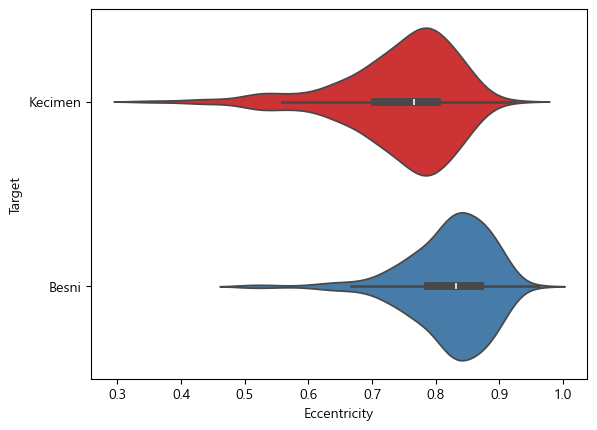

In [122]:
sns.violinplot(data=xy_overall, x='Eccentricity', y='Target', palette='Set1')


<Axes: xlabel='Extent', ylabel='Target'>

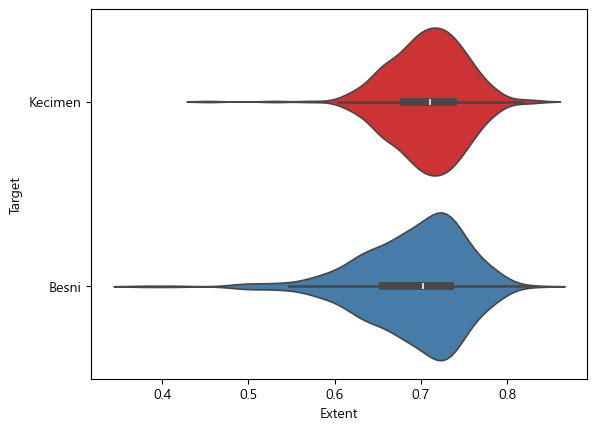

In [123]:
sns.violinplot(data=xy_overall, x='Extent', y='Target', palette='Set1')

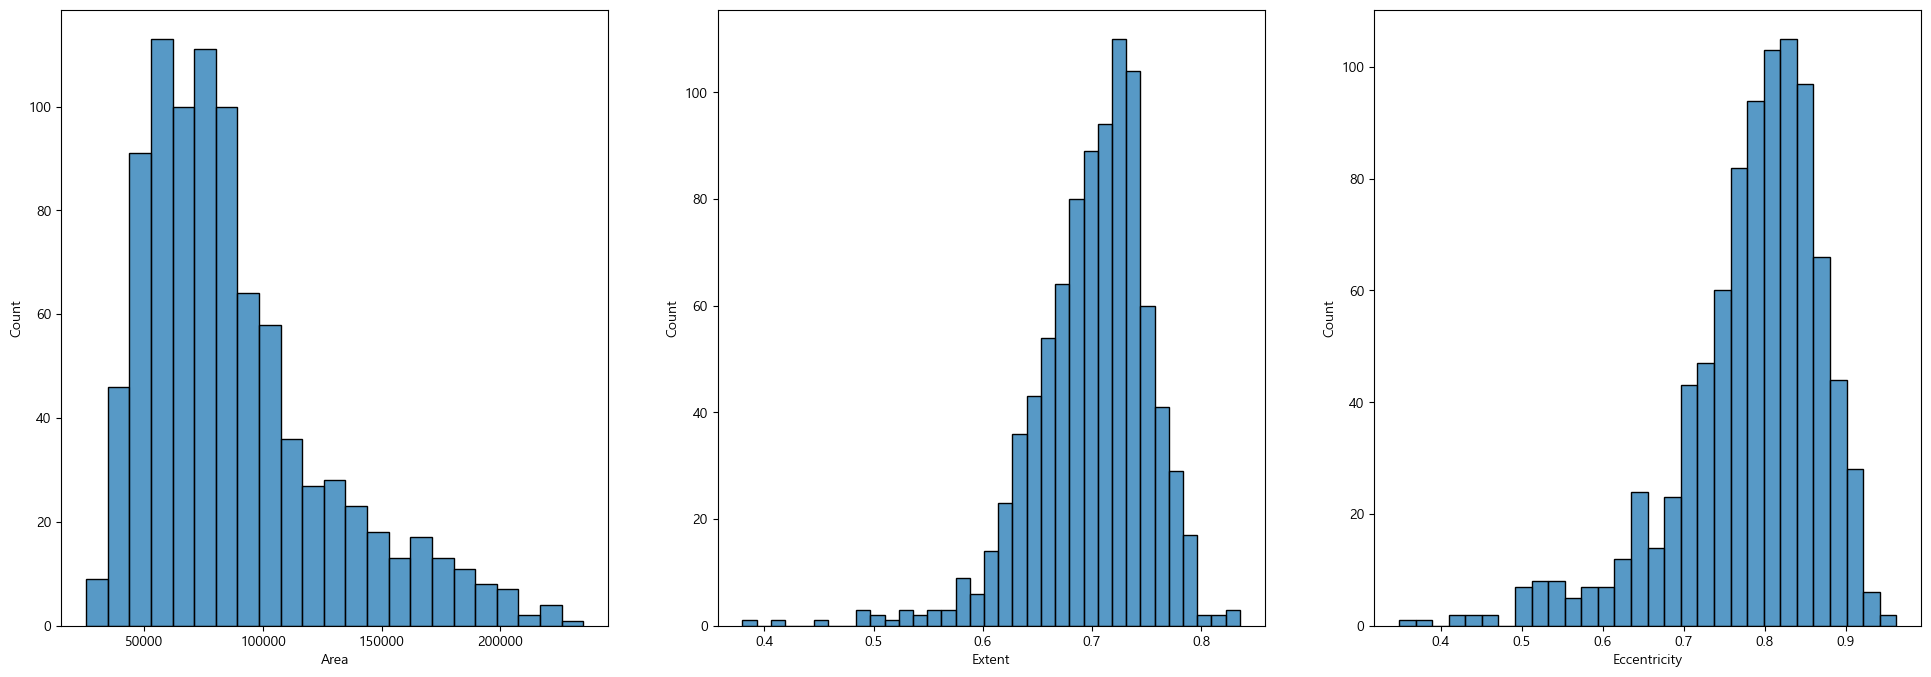

In [124]:
# 수치형자료 히스토그램으로 분포 확인
fig, ax = plt.subplots(figsize=(24, 8), ncols=3)
cols = ["Area", "Extent", "Eccentricity"]
for i, col in enumerate(cols):
    sns.histplot(data=xy_overall, x=col, ax=ax[i])

In [125]:
print(x_refined.skew())
print(x_refined.kurtosis())

Area            1.175237
Eccentricity   -1.327503
Extent         -1.151505
dtype: float64
Area            1.074073
Eccentricity    2.492121
Extent          3.341384
dtype: float64


In [126]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
from scipy.stats import kurtosis


transformed_extent = PowerTransformer(method='yeo-johnson').fit_transform(pd.DataFrame(x_refined["Extent"]))
transformed_eccent = PowerTransformer(method="yeo-johnson").fit_transform(pd.DataFrame(x_refined["Eccentricity"]))
kurt_extent = kurtosis(transformed_extent)
kurt_eccent = kurtosis(transformed_eccent)

x_refined['Area'] = np.log1p(x_refined['Area'])
x_refined['Eccentricity'] = np.log1p(x_refined['Eccentricity'])

log_scaled_cols = ['Area', 'Eccentricity']

x_refined["Extent"] = transformed_extent
x_refined["Eccentricity"] = transformed_eccent
x_refined[log_scaled_cols] = StandardScaler().fit_transform(x_refined[log_scaled_cols])

In [127]:
print(x_refined.skew())
print(x_refined.kurtosis())

Area            0.223558
Eccentricity   -0.068109
Extent          0.025427
dtype: float64
Area           -0.381873
Eccentricity   -0.249207
Extent          0.352502
dtype: float64


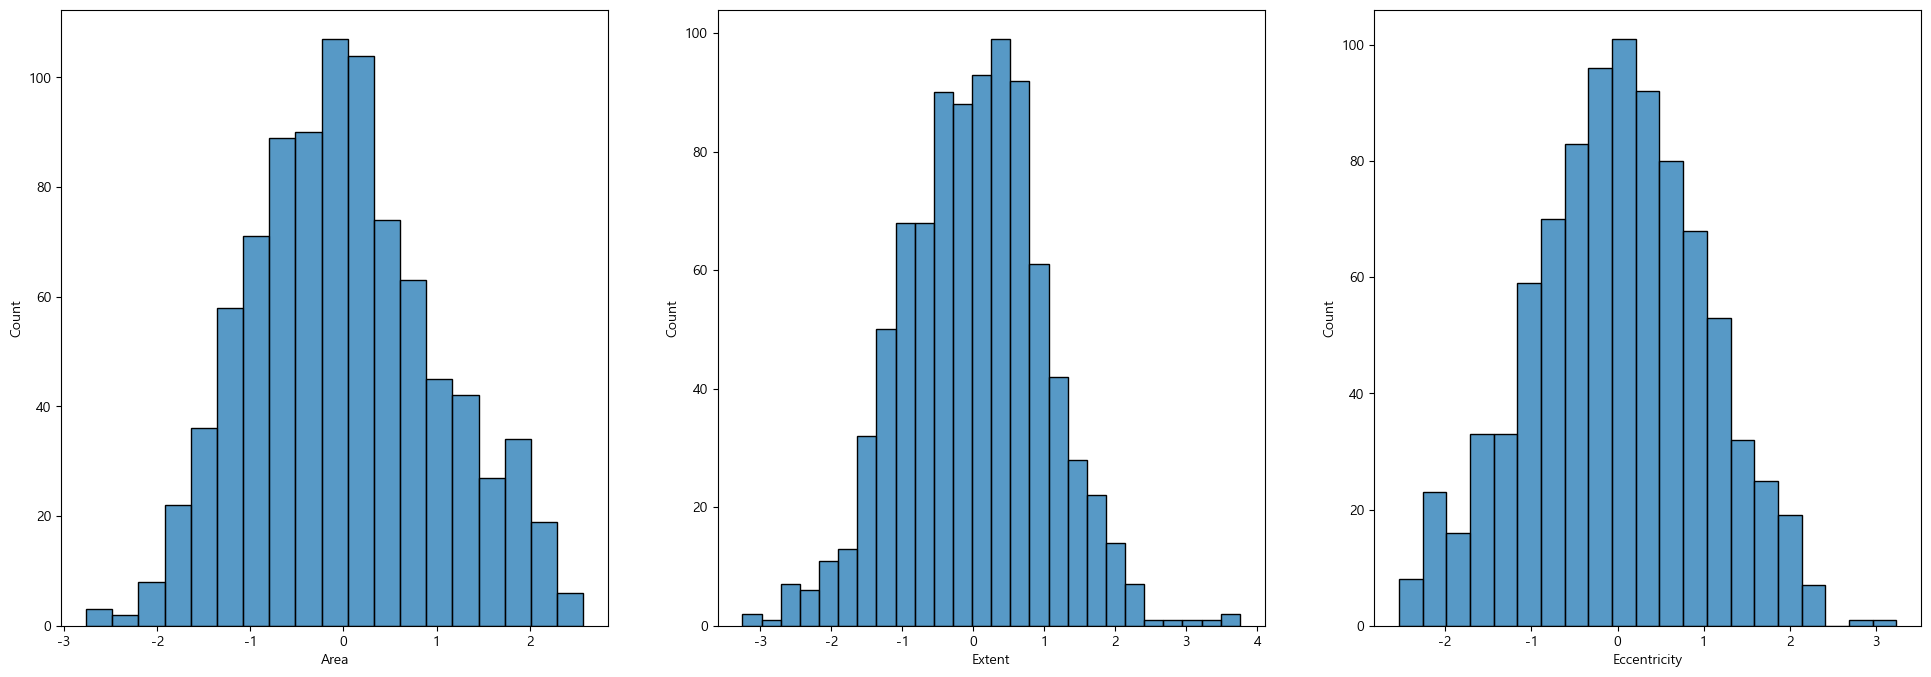

In [128]:
# 수치형자료 히스토그램으로 분포 확인
fig, ax = plt.subplots(figsize=(24, 8), ncols=3)
cols = ["Area", "Extent", "Eccentricity"]
for i, col in enumerate(cols):
    sns.histplot(data=x_refined, x=col, ax=ax[i])

In [129]:
x_refined['target'] = y
x_refined.to_csv("건포도_refined.csv")